# Geohazards in Cascadia

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import shape
from scipy.interpolate import griddata
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import json

## Load and Plot USGS ShakeMap Data

### ShakeMap Shape Files

In [2]:
zip_path = "shape.zip"

# Load the shape files into a GeoDataFrame
gdf_shake = gpd.read_file(f"zip://{zip_path}")

# Display the first few rows
print(gdf_shake.head())


   AREA  PERIMETER  PGAPOL_  PGAPOL_ID  GRID_CODE  PARAMVALUE  \
0   0.0        0.0        0          0          0        0.01   
1   0.0        0.0        1          1          0        0.02   
2   0.0        0.0        2          2          0        0.04   
3   0.0        0.0        3          3          0        0.06   
4   0.0        0.0        4          4          0        0.08   

                                            geometry  
0  MULTIPOLYGON (((-127.26707 38.1495, -127.26382...  
1  MULTIPOLYGON (((-123.18308 43.87761, -123.1839...  
2  MULTIPOLYGON (((-123.72073 44.25586, -123.7203...  
3  MULTIPOLYGON (((-122.72754 47.56055, -122.7276...  
4  MULTIPOLYGON (((-127.26707 48.57393, -127.2641...  


C:\Users\lamen\anaconda3\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'shape.zip': 'psa3p0' (default), 'psa1p0', 'psa0p3', 'pgv', 'pga', 'mi'. Specify layer parameter to avoid this warning.
  result = read_func(


### Intensity Contours

                                            geometry  value units    color  \
0  MULTILINESTRING ((-117.72081 52.55741, -117.68...    3.0   mmi  #a0e5ff   
1  MULTILINESTRING ((-120.85835 52.55741, -120.78...    3.5   mmi  #90f2ff   
2  MULTILINESTRING ((-122.86862 52.55741, -122.94...    4.0   mmi  #80ffff   
3  MULTILINESTRING ((-127.26707 52.32028, -126.90...    4.5   mmi  #7cffc7   
4  MULTILINESTRING ((-127.26707 51.82165, -126.82...    5.0   mmi  #7cff90   

   weight  
0       2  
1       4  
2       2  
3       4  
4       2  


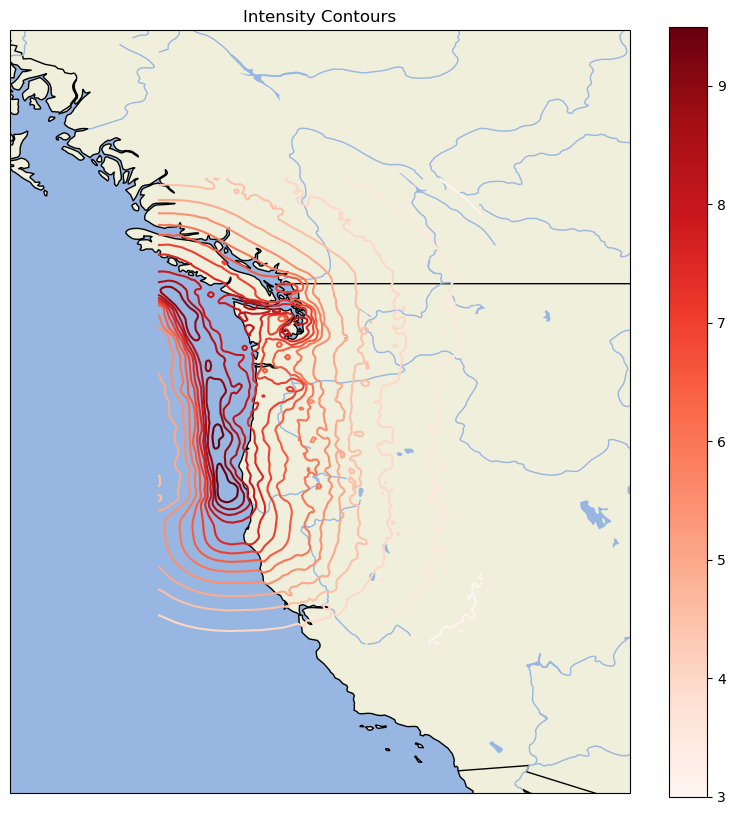

In [3]:
# Define the URL
url = 'https://earthquake.usgs.gov/product/shakemap-scenario/_median_se/us/1605643892799/download/cont_mmi.json'

# Fetch the hazard data
response = requests.get(url)
data = response.json()

# Convert to GeoDataFrame
gdf_ic = gpd.GeoDataFrame.from_features(data['features'])

# Display the first few rows
print(gdf_ic.head())

# create a plot of the intensity contours
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Overlay natural features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

# set the map extent to the bounds of data (with a small buffer)
minx, miny, maxx, maxy = gdf_ic.total_bounds
buffer = 5  # degrees; adjust as needed
ax.set_extent([minx - buffer, maxx + buffer, miny - buffer, maxy + buffer])

# determine the range of intensity values
vmin = gdf_ic['value'].min()
vmax = gdf_ic['value'].max()

# Plot the intensity contours with a colormap
mesh = gdf_ic.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    column='value',
    cmap='Reds',
    alpha=1.0,
    legend=True)

plt.title('Intensity Contours')
plt.show()


### PGA

                                            geometry  value units    color  \
0  MULTILINESTRING ((-117.32029 52.55741, -117.30...    0.5  pctg  #a5e1ff   
1  MULTILINESTRING ((-120.408 52.55741, -120.4041...    1.0  pctg  #96edff   
2  MULTILINESTRING ((-122.51163 52.55741, -122.49...    2.0  pctg  #87f9ff   
3  MULTILINESTRING ((-125.12093 52.14276, -125.21...    5.0  pctg  #7cffb7   
4  MULTILINESTRING ((-127.26707 51.12082, -126.81...   10.0  pctg  #dfff22   

   weight  
0       4  
1       4  
2       4  
3       4  
4       4  


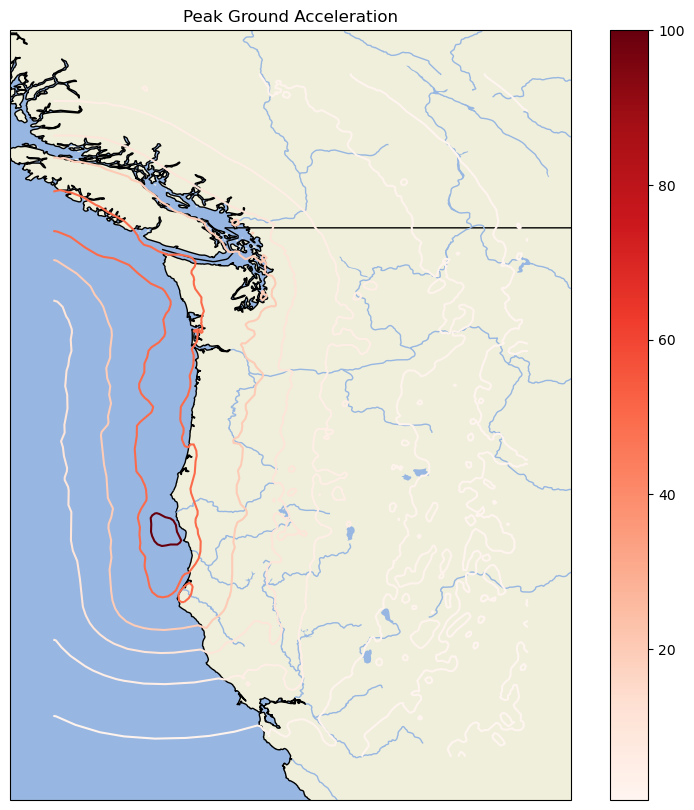

In [4]:
# Define the URL
url = 'https://earthquake.usgs.gov/product/shakemap-scenario/_median_se/us/1605643892799/download/cont_pga.json'

# Fetch the  data
response = requests.get(url)
data = response.json()

# Convert to GeoDataFrame
gdf_pga = gpd.GeoDataFrame.from_features(data['features'])

# Display the first few rows
print(gdf_pga.head())

# Plot the PGA
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

minx, miny, maxx, maxy = gdf_pga.total_bounds
buffer = 1
ax.set_extent([minx - buffer, maxx + buffer, miny - buffer, maxy + buffer])

mesh = gdf_pga.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    column='value',
    cmap='Reds',
    alpha=1.0,
    legend=True)

plt.title('Peak Ground Acceleration')
plt.show()


### PGV

                                            geometry  value units    color  \
0  MULTILINESTRING ((-117.26248 52.55741, -117.22...    0.5   cms  #95eeff   
1  MULTILINESTRING ((-120.00062 52.55741, -119.99...    1.0   cms  #87f9ff   
2  MULTILINESTRING ((-122.4065 52.55741, -122.408...    2.0   cms  #7effe5   
3  MULTILINESTRING ((-124.98182 51.99225, -125.00...    5.0   cms  #87ff84   
4  MULTILINESTRING ((-127.26707 51.25633, -127.24...   10.0   cms  #fffc00   

   weight  
0       4  
1       4  
2       4  
3       4  
4       4  


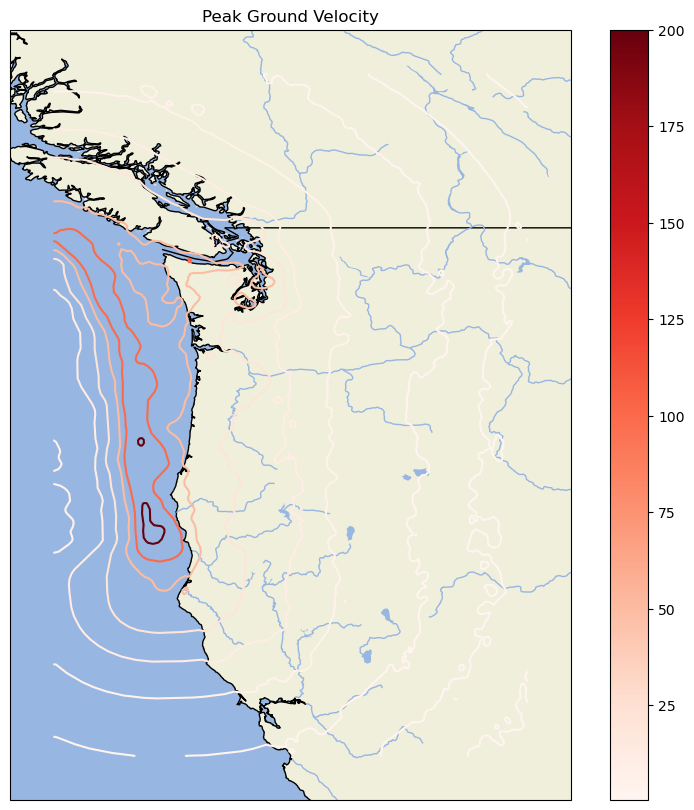

In [5]:
# Define the URL
url = 'https://earthquake.usgs.gov/product/shakemap-scenario/_median_se/us/1605643892799/download/cont_pgv.json'

# Fetch the hazard data
response = requests.get(url)
data = response.json()

# Convert to GeoDataFrame
gdf_pgv = gpd.GeoDataFrame.from_features(data['features'])

# Display the first few rows
print(gdf_pgv.head())

# Plot the PGV
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

minx, miny, maxx, maxy = gdf_pgv.total_bounds
buffer = 1  # degrees; adjust as needed
ax.set_extent([minx - buffer, maxx + buffer, miny - buffer, maxy + buffer])

mesh = gdf_pgv.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    column='value',
    cmap='Reds',
    alpha=1.0,
    legend=True)

plt.title('Peak Ground Velocity')
plt.show()


### PSA 0.3

                                            geometry  value units    color  \
0  MULTILINESTRING ((-116.31775 37.90376, -116.35...    0.5  pctg  #b1d7ff   
1  MULTILINESTRING ((-118.45984 52.55741, -118.43...    1.0  pctg  #a1e4ff   
2  MULTILINESTRING ((-120.81736 52.55741, -120.77...    2.0  pctg  #91f1ff   
3  MULTILINESTRING ((-122.79903 52.55741, -122.84...    5.0  pctg  #7ffff2   
4  MULTILINESTRING ((-127.26707 52.22477, -127.08...   10.0  pctg  #7cffbb   

   weight  
0       4  
1       4  
2       4  
3       4  
4       4  


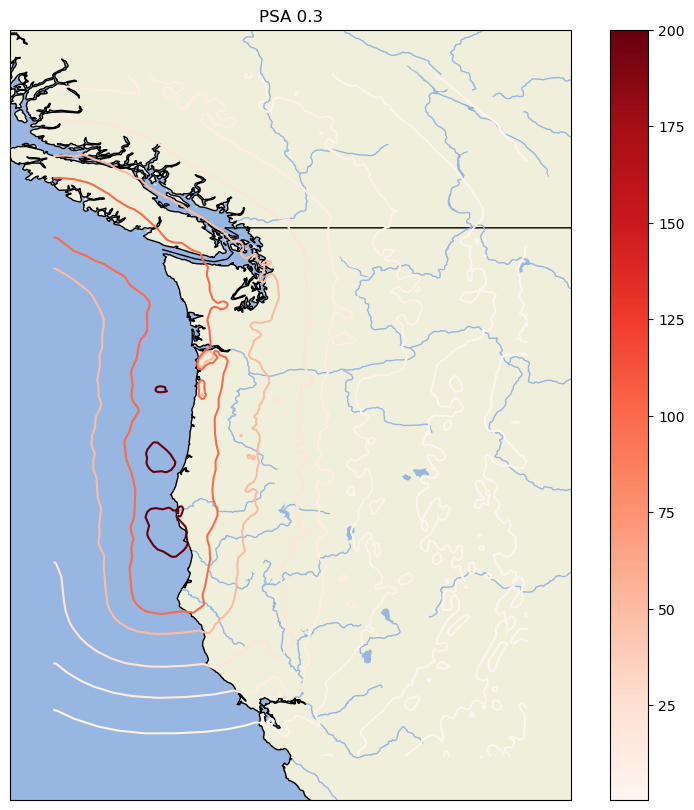

In [6]:
# Define the URL
url = 'https://earthquake.usgs.gov/product/shakemap-scenario/_median_se/us/1605643892799/download/cont_psa0p3.json'

# Fetch the hazard data
response = requests.get(url)
data = response.json()

# Convert to GeoDataFrame
gdf_psa0p3 = gpd.GeoDataFrame.from_features(data['features'])

# Display the first few rows
print(gdf_psa0p3.head())

# Plot PSA 0.3
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

minx, miny, maxx, maxy = gdf_psa0p3.total_bounds
buffer = 1  # degrees; adjust as needed
ax.set_extent([minx - buffer, maxx + buffer, miny - buffer, maxy + buffer])

mesh = gdf_psa0p3.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    column='value',
    cmap='Reds',
    alpha=1.0,
    legend=True)

plt.title('PSA 0.3')
plt.show()


### PSA 1.0

                                            geometry  value units    color  \
0  MULTILINESTRING ((-117.84928 52.55741, -117.80...    0.5  pctg  #8ff3ff   
1  MULTILINESTRING ((-120.59387 52.55741, -120.56...    1.0  pctg  #80ffff   
2  MULTILINESTRING ((-122.5034 52.55741, -122.483...    2.0  pctg  #7dffd0   
3  MULTILINESTRING ((-125.216 52.55741, -125.2004...    5.0  pctg  #87ff84   
4  MULTILINESTRING ((-127.26707 51.07034, -126.77...   10.0  pctg  #f9ff05   

   weight  
0       4  
1       4  
2       4  
3       4  
4       4  


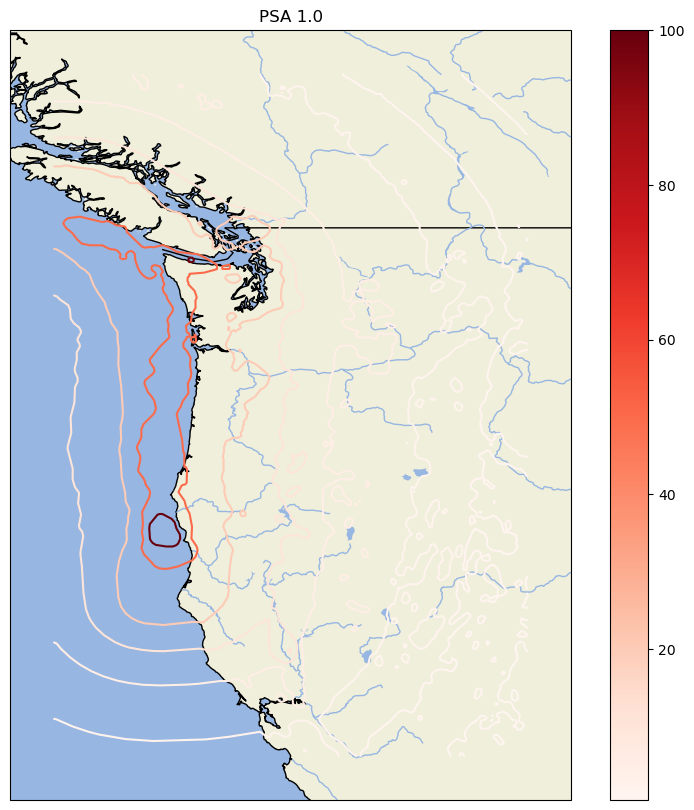

In [7]:
# Define the URL
url = 'https://earthquake.usgs.gov/product/shakemap-scenario/_median_se/us/1605643892799/download/cont_psa1p0.json'

# Fetch the hazard data
response = requests.get(url)
data = response.json()

# Convert to GeoDataFrame
gdf_psa1p0 = gpd.GeoDataFrame.from_features(data['features'])

# Display the first few rows
print(gdf_psa1p0.head())

# plot PSA 1.0
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

minx, miny, maxx, maxy = gdf_psa1p0.total_bounds
buffer = 1  # degrees; adjust as needed
ax.set_extent([minx - buffer, maxx + buffer, miny - buffer, maxy + buffer])

mesh = gdf_psa1p0.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    column='value',
    cmap='Reds',
    alpha=1.0,
    legend=True)

plt.title('PSA 1.0')
plt.show()


### PSA 3.0

                                            geometry  value units    color  \
0  MULTILINESTRING ((-116.36589 52.55741, -116.31...    0.2  pctg  #7fffee   
1  MULTILINESTRING ((-120.68541 52.55741, -120.66...    0.5  pctg  #7cffbb   
2  MULTILINESTRING ((-124.0164 52.55741, -123.986...    1.0  pctg  #7aff95   
3  MULTILINESTRING ((-127.26707 51.80438, -126.57...    2.0  pctg  #efff11   
4  MULTILINESTRING ((-127.26707 50.62952, -126.75...    5.0  pctg  #ffc200   

   weight  
0       4  
1       4  
2       4  
3       4  
4       4  


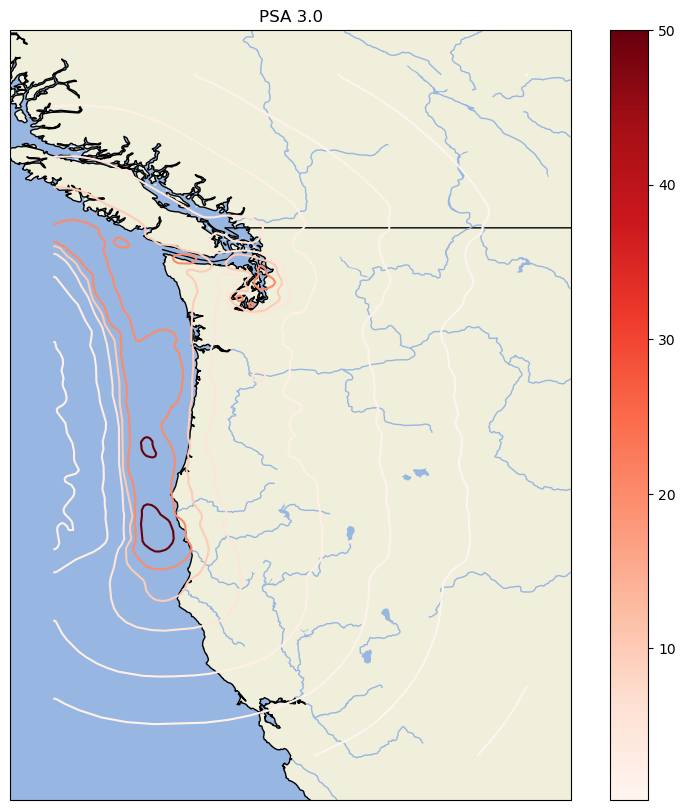

In [8]:
# Define the URL
url = 'https://earthquake.usgs.gov/product/shakemap-scenario/_median_se/us/1605643892799/download/cont_psa3p0.json'

# Fetch the hazard data
response = requests.get(url)
data = response.json()

# Convert to GeoDataFrame
gdf_psa3p0 = gpd.GeoDataFrame.from_features(data['features'])

# Display the first few rows
print(gdf_psa3p0.head())

# plot PSA 3.0
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

minx, miny, maxx, maxy = gdf_psa3p0.total_bounds
buffer = 1  # degrees; adjust as needed
ax.set_extent([minx - buffer, maxx + buffer, miny - buffer, maxy + buffer])

mesh = gdf_psa3p0.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    column='value',
    cmap='Reds',
    alpha=1.0,
    legend=True)

plt.title('PSA 3.0')
plt.show()

Intensity Contours - https://earthquake.usgs.gov/product/shakemap-scenario/_median_se/us/1605643892799/download/cont_mmi.json
PGA - https://earthquake.usgs.gov/product/shakemap-scenario/_median_se/us/1605643892799/download/cont_pga.json
PGV - https://earthquake.usgs.gov/product/shakemap-scenario/_median_se/us/1605643892799/download/cont_pgv.json
PSA 0.3 - https://earthquake.usgs.gov/product/shakemap-scenario/_median_se/us/1605643892799/download/cont_psa0p3.json
PSA 1.0 - https://earthquake.usgs.gov/product/shakemap-scenario/_median_se/us/1605643892799/download/cont_psa1p0.json
PSA 3.0 - https://earthquake.usgs.gov/product/shakemap-scenario/_median_se/us/1605643892799/download/cont_psa3p0.json

## Load and Plot Tsunami Inundation Zones

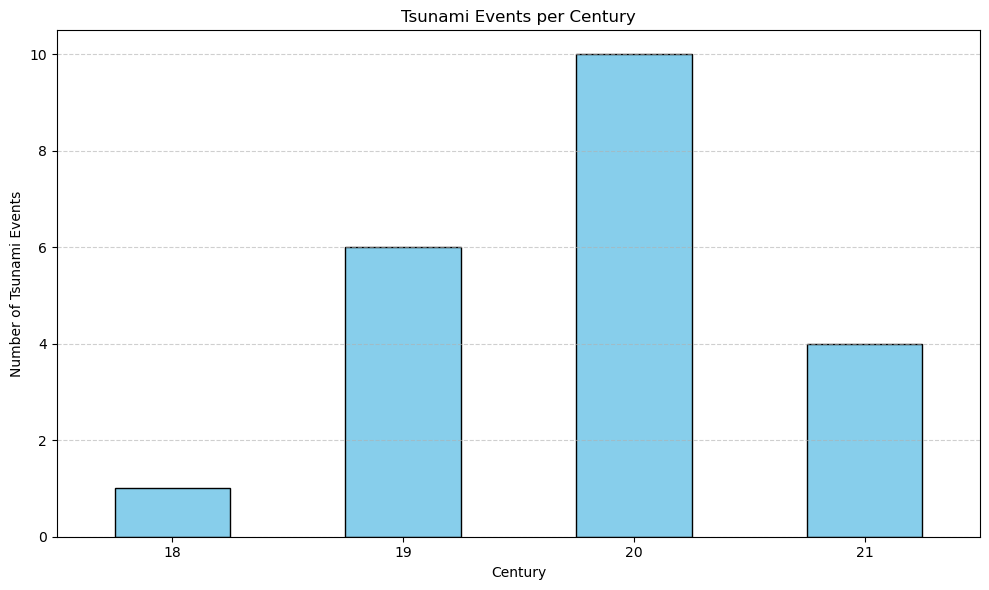

In [9]:
# Load the JSON file
with open("tsunami_data.json", "r") as f:
    data = json.load(f)

# Extract tsunami events
df_tsunami = pd.DataFrame(data["items"])

# Drop rows with missing year
df_tsunami = df_tsunami.dropna(subset=["year"])

# Convert year to integer
df_tsunami["year"] = df_tsunami["year"].astype(int)

# Add a century column
df_tsunami["century"] = (df_tsunami["year"] // 100 + 1)

# Count events per century
events_by_century = df_tsunami["century"].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
events_by_century.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Century")
plt.ylabel("Number of Tsunami Events")
plt.title("Tsunami Events per Century")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\lamen\AppData\Local\Temp\ipykernel_17704\3168647380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mag["year"] = df_mag["year"].astype(int)


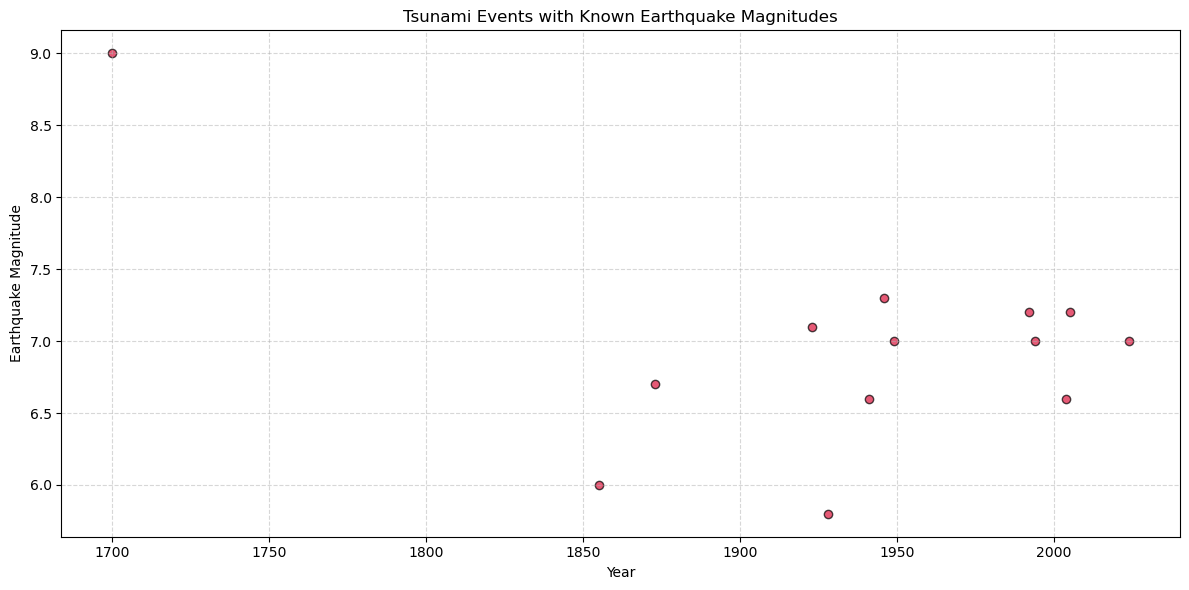

In [10]:
# Drop rows with missing magnitude or year
df_mag = df_tsunami.dropna(subset=["year", "eqMagnitude"])

# Convert year to integer for consistency
df_mag["year"] = df_mag["year"].astype(int)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(df_mag["year"], df_mag["eqMagnitude"], color="crimson", edgecolor="black", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Earthquake Magnitude")
plt.title("Tsunami Events with Known Earthquake Magnitudes")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


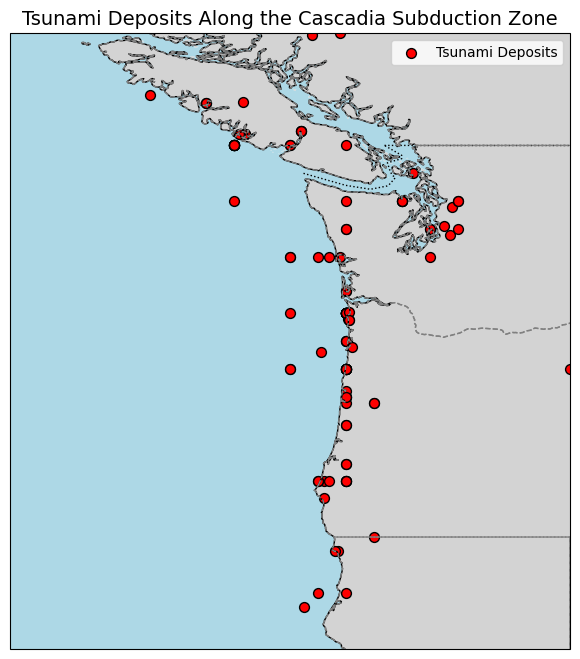

In [11]:
# Load the JSON file 
with open('tsunami_deposits.json', 'r') as f:
    data = json.load(f)

# Extract and normalize the nested 'items' field
df_deposits = pd.json_normalize(data['items'])

# Rename columns for clarity
df_deposits.rename(columns={
    'latitude': 'lat',
    'longitude': 'lon',
    'locationName': 'site',
    'year': 'year',
    'eventDescription': 'description'
}, inplace=True)

# Drop rows with missing coordinates
df_deposits = df_deposits.dropna(subset=['lat', 'lon'])

# Set up Cartopy map, zoomed to Cascadia Subduction Zone
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='gray')

# Set extent to Cascadia coast 
ax.set_extent([-130, -120, 40, 51], crs=ccrs.PlateCarree())

# Plot tsunami deposit sites
scatter = ax.scatter(
    df_deposits['lon'], df_deposits['lat'],
    c='red', s=50, edgecolor='k', label='Tsunami Deposits'
)

plt.title('Tsunami Deposits Along the Cascadia Subduction Zone', fontsize=14)
plt.legend()

plt.show()


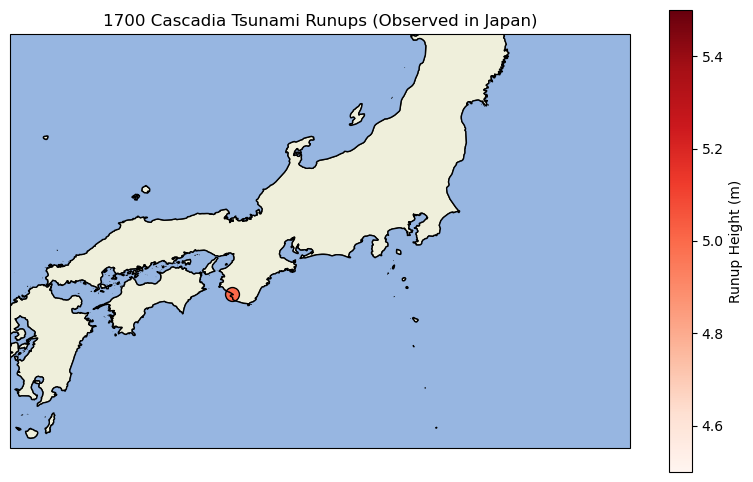

In [12]:
# Load the nested JSON from file
with open("runup_data.json") as f:
    data = json.load(f)

# Extract runup entries
items = data['items'][0]
df_runups = pd.json_normalize(items)

# Rename relevant columns for consistency
df_runups = df_runups.rename(columns={
    'latitude': 'lat',
    'longitude': 'lon',
    'runupHt': 'runup_height_m',
    'locationName': 'site'
})

# Convert lat/lon and runup height to numeric
df_runups['lat'] = pd.to_numeric(df_runups['lat'], errors='coerce')
df_runups['lon'] = pd.to_numeric(df_runups['lon'], errors='coerce')
df_runups['runup_height_m'] = pd.to_numeric(df_runups['runup_height_m'], errors='coerce')

# Drop rows with missing values in any key column
df_runups = df_runups.dropna(subset=['lat', 'lon', 'runup_height_m'])

# Plot using Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add base map features
ax.coastlines()
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.set_extent([130, 145, 30, 40])  # Adjusted for Japan coast, where these data are

# Plot runup points
sc = ax.scatter(df_runups['lon'], df_runups['lat'],
                c=df_runups['runup_height_m'], cmap='Reds', s=100,
                edgecolor='black', transform=ccrs.PlateCarree())

# Add colorbar and title
plt.colorbar(sc, label='Runup Height (m)')
plt.title('1700 Cascadia Tsunami Runups (Observed in Japan)')
plt.show()


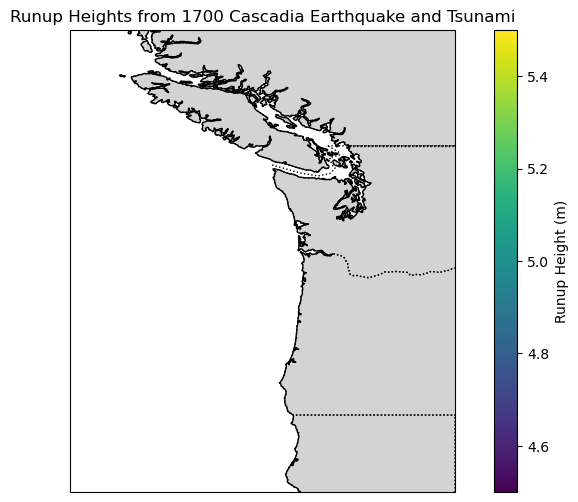

In [15]:
# Filter valid data
df_runups = df_runups.dropna(subset=['lat', 'lon', 'runup_height_m'])

# Set up map
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-130, -120, 40, 52], crs=ccrs.PlateCarree())  # Cascadia region

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

# Plot runup points
sc = ax.scatter(
    df_runups['lon'], df_runups['lat'],
    c=df_runups['runup_height_m'], cmap='viridis', s=50,
    edgecolor='k', transform=ccrs.PlateCarree()
)

plt.colorbar(sc, ax=ax, label='Runup Height (m)')
plt.title('Runup Heights from 1700 Cascadia Earthquake and Tsunami')
plt.show()


## Load and Plot Landslide Susceptibility Zones

C:\Users\lamen\anaconda3\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


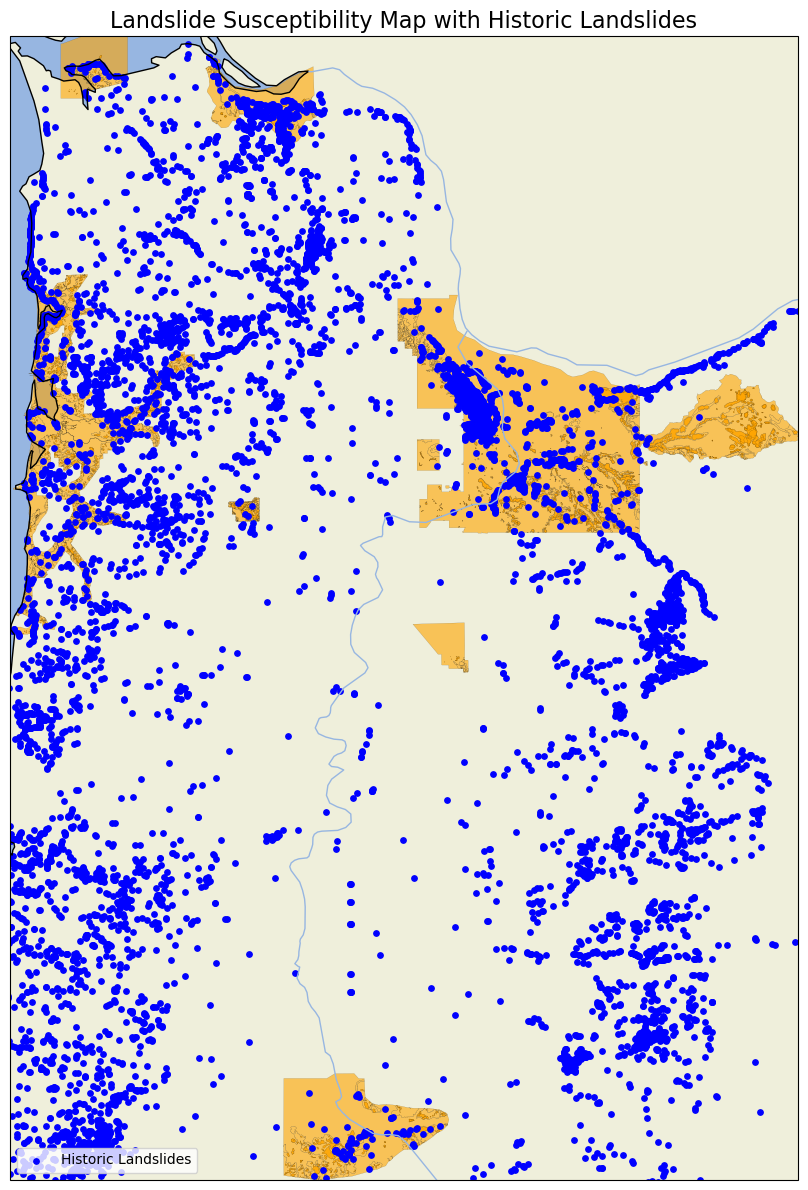

In [16]:
# Load layers from the .gdb
gdf_sus = gpd.read_file("slido/slido.gdb", layer="Detailed_Deep_Landslide_Susceptibility")
gdf_hist = gpd.read_file("slido/slido.gdb", layer="Historic_Landslide_Points")

# Ensure both datasets use the same CRS (WGS84 for Cartopy)
gdf_sus = gdf_sus.to_crs(epsg=4326)
gdf_hist = gdf_hist.to_crs(epsg=4326)

# Setup plot
fig, ax = plt.subplots(figsize=(14, 12),
                       subplot_kw={'projection': ccrs.PlateCarree()})

# Add map background
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Plot susceptibility polygons
if "Susceptibility" in gdf_sus.columns:
    gdf_sus.plot(ax=ax,
                 column="Susceptibility",
                 cmap="YlOrRd",
                 legend=True,
                 legend_kwds={'shrink': 0.5},
                 alpha=0.6,
                 edgecolor='black',
                 linewidth=0.1)
else:
    gdf_sus.plot(ax=ax,
                 color='orange',
                 alpha=0.6,
                 edgecolor='black',
                 linewidth=0.1)

# Plot historic landslide points
gdf_hist.plot(ax=ax,
              color='blue',
              markersize=15,
              label='Historic Landslides')

# Set extent to the bounds of susceptibility layer
minx, miny, maxx, maxy = gdf_sus.total_bounds
ax.set_extent([minx, maxx, miny, maxy], crs=ccrs.PlateCarree())

# Title, legend, etc.
plt.title("Landslide Susceptibility Map with Historic Landslides", fontsize=16)
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

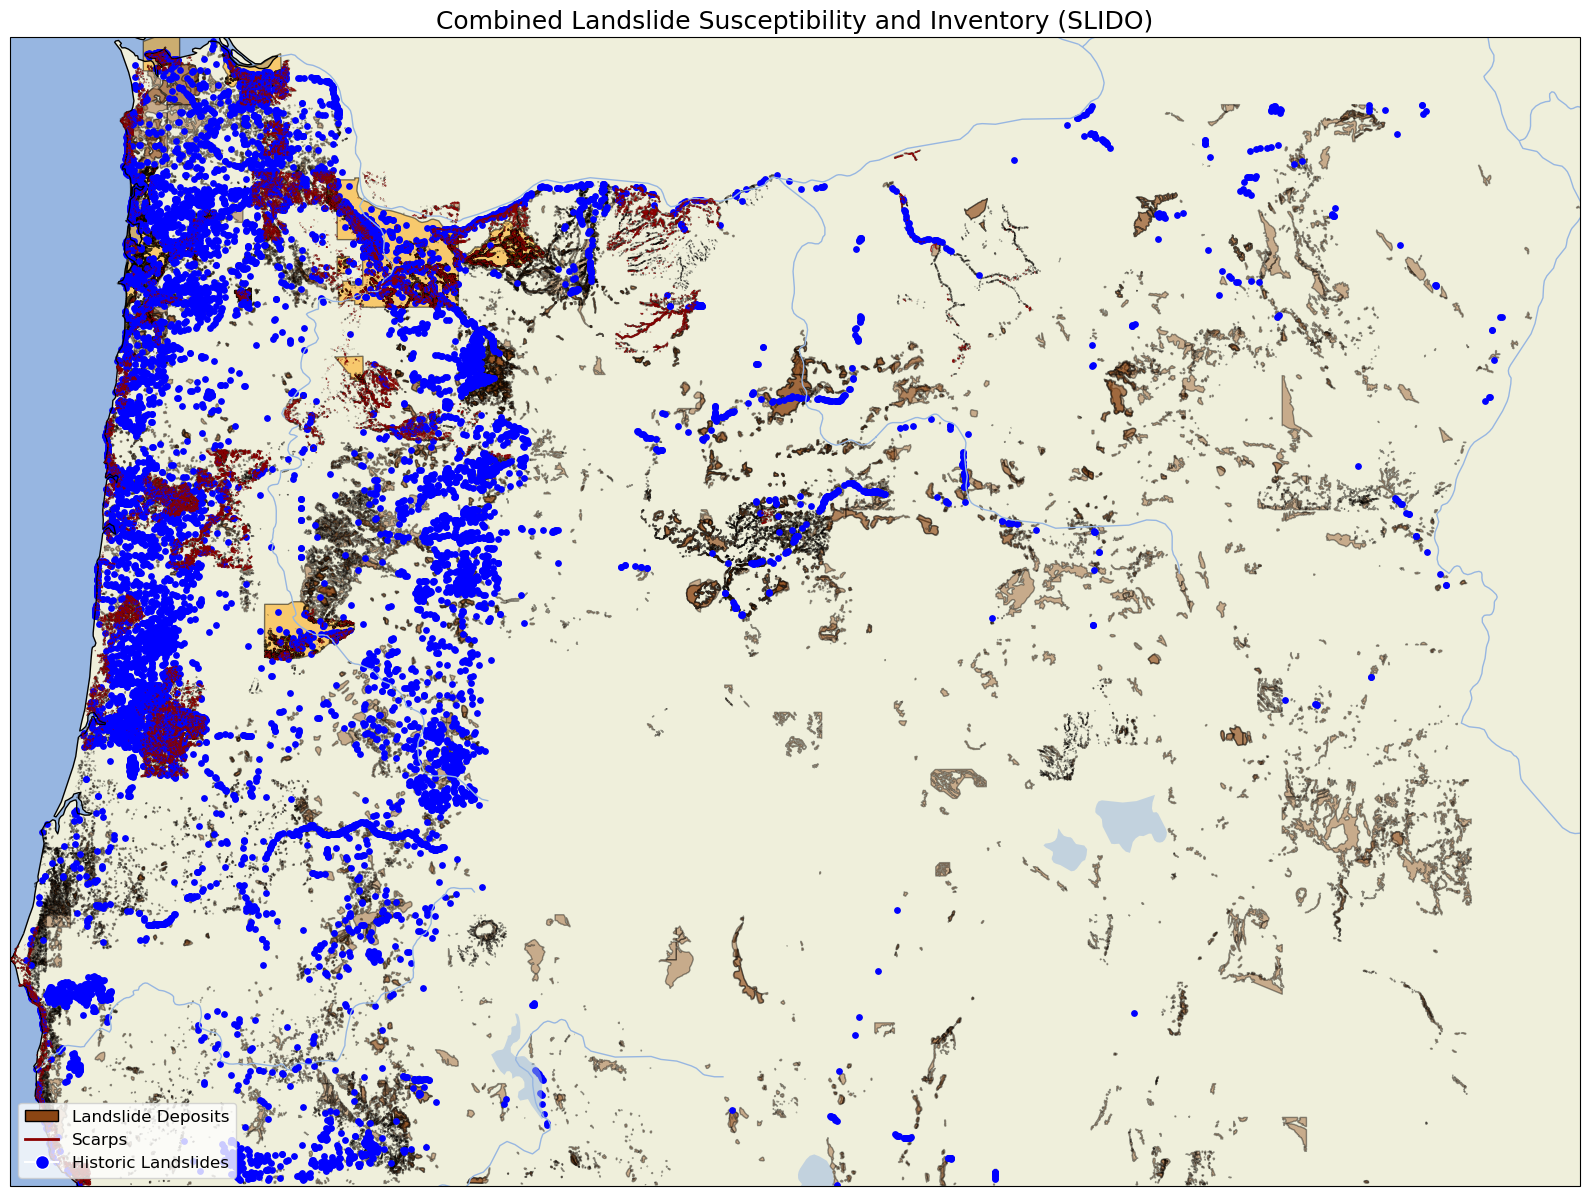

In [17]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Load and convert all key layers to WGS84 (EPSG:4326)
gdf_sus = gpd.read_file("slido/slido.gdb", layer="Detailed_Deep_Landslide_Susceptibility").to_crs(epsg=4326)
gdf_deposits = gpd.read_file("slido/slido.gdb", layer="Deposits").to_crs(epsg=4326)
gdf_scarps = gpd.read_file("slido/slido.gdb", layer="Scarps").to_crs(epsg=4326)
gdf_points = gpd.read_file("slido/slido.gdb", layer="Historic_Landslide_Points").to_crs(epsg=4326)

# Setup plot
fig, ax = plt.subplots(figsize=(16, 14), subplot_kw={'projection': ccrs.PlateCarree()})

# Add basemap
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)

# Plot susceptibility polygons
if "Susceptibility" in gdf_sus.columns:
    gdf_sus.plot(ax=ax,
                 column="Susceptibility",
                 cmap="YlOrRd",
                 legend=True,
                 legend_kwds={'label': "Deep Landslide Susceptibility", 'shrink': 0.5},
                 alpha=0.6,
                 edgecolor='black',
                 linewidth=0.1)
else:
    gdf_sus.plot(ax=ax, color='orange', alpha=0.5, edgecolor='black')

# Plot other layers
gdf_deposits.plot(ax=ax, color='saddlebrown', alpha=0.4, edgecolor='black', label='Landslide Deposits')
gdf_scarps.plot(ax=ax, color='darkred', alpha=0.8, linewidth=1, label='Scarps')
gdf_points.plot(ax=ax, color='blue', markersize=15, label='Historic Landslide Points')

# Set map extent to cover all layers
total_bounds = gpd.GeoSeries(
    pd.concat([gdf_sus.geometry, gdf_deposits.geometry, gdf_points.geometry, gdf_scarps.geometry])
).total_bounds
minx, miny, maxx, maxy = total_bounds
ax.set_extent([minx, maxx, miny, maxy], crs=ccrs.PlateCarree())

# Custom legend handles
legend_elements = [
    Patch(facecolor='saddlebrown', edgecolor='black', label='Landslide Deposits', alpha=1.0),
    Line2D([0], [0], color='darkred', lw=2, label='Scarps'),
    Line2D([0], [0], marker='o', color='w', label='Historic Landslides',
           markerfacecolor='blue', markersize=10)
]

# Add legend
ax.legend(handles=legend_elements, loc='lower left', fontsize=12)

plt.title("Combined Landslide Susceptibility and Inventory (SLIDO)", fontsize=18)
plt.tight_layout()
plt.show()


## Overlay Map of Cascading Hazards

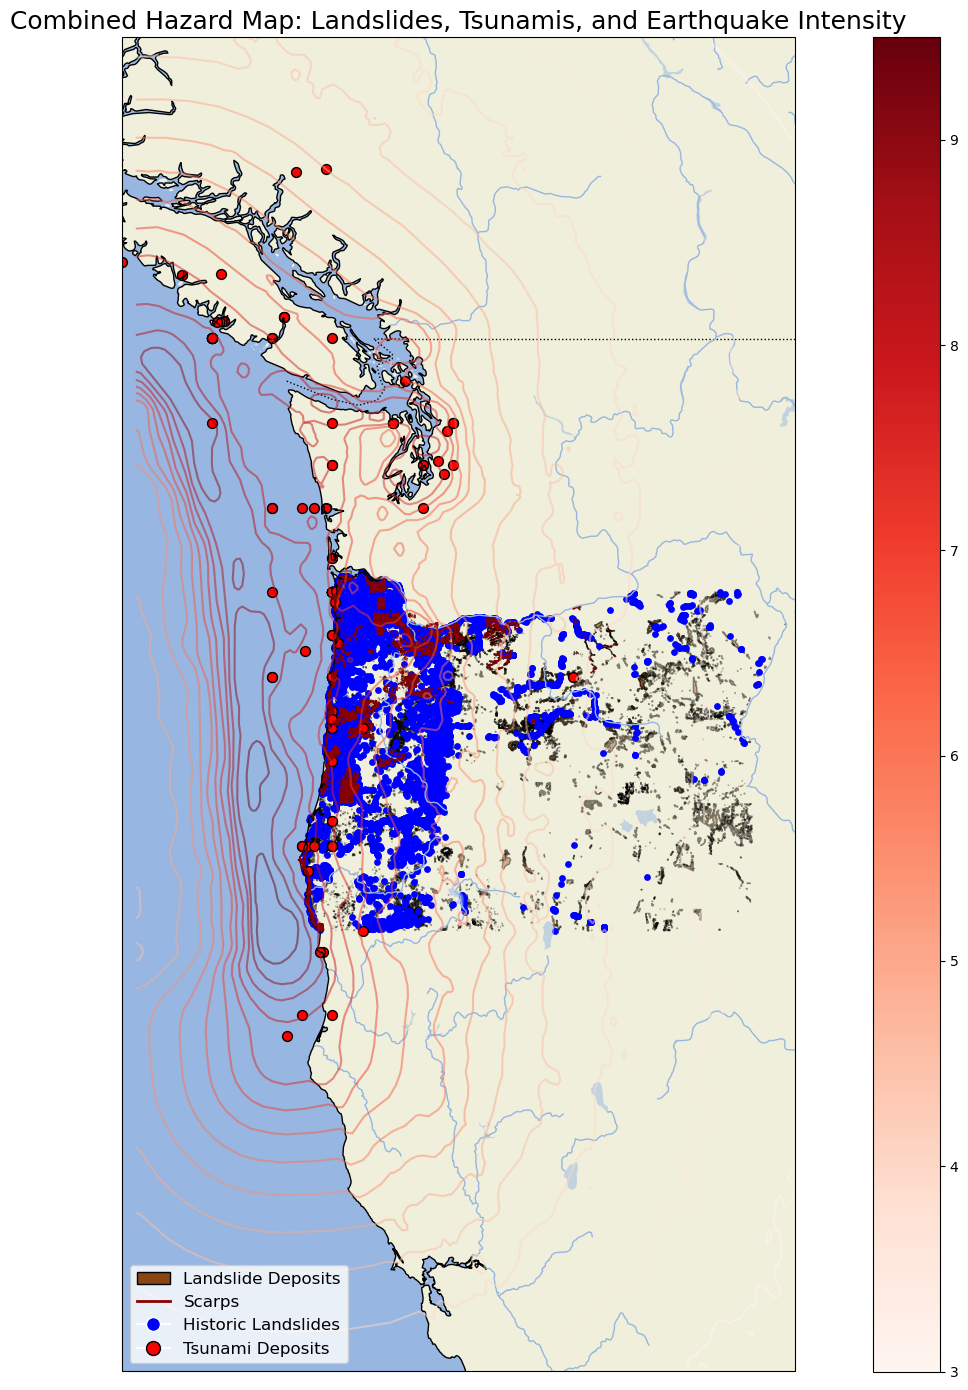

In [18]:
# Load and convert all key layers to WGS84 (EPSG:4326)
gdf_sus = gpd.read_file("slido/slido.gdb", layer="Detailed_Deep_Landslide_Susceptibility").to_crs(epsg=4326)
gdf_deposits = gpd.read_file("slido/slido.gdb", layer="Deposits").to_crs(epsg=4326)
gdf_scarps = gpd.read_file("slido/slido.gdb", layer="Scarps").to_crs(epsg=4326)
gdf_points = gpd.read_file("slido/slido.gdb", layer="Historic_Landslide_Points").to_crs(epsg=4326)

# Load tsunami deposits from JSON
with open('tsunami_deposits.json', 'r') as f:
    tsunami_data = json.load(f)
df_deposits = pd.json_normalize(tsunami_data['items'])
df_deposits = df_deposits.dropna(subset=['latitude', 'longitude'])

# Create GeoDataFrame for tsunami deposits
gdf_tsunami = gpd.GeoDataFrame(
    df_deposits,
    geometry=gpd.points_from_xy(df_deposits['longitude'], df_deposits['latitude']),
    crs="EPSG:4326"
)

# Load earthquake intensity contours
def load_shakemap_layer(url):
    response = requests.get(url)
    data = response.json()
    gdf = gpd.GeoDataFrame.from_features(data['features'])
    gdf.set_crs(epsg=4326, inplace=True)  # Set the CRS explicitly
    return gdf


gdf_mmi = load_shakemap_layer('https://earthquake.usgs.gov/product/shakemap-scenario/_median_se/us/1605643892799/download/cont_mmi.json')

# Setup plot
fig, ax = plt.subplots(figsize=(16, 14), subplot_kw={'projection': ccrs.PlateCarree()})

# Add basemap features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)

# Plot layers
if "Susceptibility" in gdf_sus.columns:
    gdf_sus.plot(ax=ax,
                 column="Susceptibility",
                 cmap="YlOrRd",
                 legend=True,
                 legend_kwds={'label': "Deep Landslide Susceptibility", 'shrink': 0.5},
                 alpha=0.6,
                 edgecolor='black',
                 linewidth=0.1)
else:
    gdf_sus.plot(ax=ax, color='orange', alpha=0.5, edgecolor='black')

gdf_deposits.plot(ax=ax, color='saddlebrown', alpha=0.4, edgecolor='black', label='Landslide Deposits')
gdf_scarps.plot(ax=ax, color='darkred', alpha=0.8, linewidth=1, label='Scarps')
gdf_points.plot(ax=ax, color='blue', markersize=15, label='Historic Landslide Points')
gdf_tsunami.plot(ax=ax, color='red', markersize=50, edgecolor='k', label='Tsunami Deposits')
gdf_mmi.plot(ax=ax, column='value', cmap='Reds', alpha=0.5, legend=True)

# Set map extent to cover all layers
all_geometries = pd.concat([
    gdf_sus.geometry,
    gdf_deposits.geometry,
    gdf_scarps.geometry,
    gdf_points.geometry,
    gdf_tsunami.geometry,
    gdf_mmi.geometry
])
minx, miny, maxx, maxy = all_geometries.total_bounds
ax.set_extent([minx, maxx, miny, maxy], crs=ccrs.PlateCarree())

# Custom legend handles
legend_elements = [
    Patch(facecolor='saddlebrown', edgecolor='black', label='Landslide Deposits', alpha=1.0),
    Line2D([0], [0], color='darkred', lw=2, label='Scarps'),
    Line2D([0], [0], marker='o', color='w', label='Historic Landslides',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Tsunami Deposits',
           markerfacecolor='red', markeredgecolor='k', markersize=10)
]

# Add legend
ax.legend(handles=legend_elements, loc='lower left', fontsize=12)

# Title and layout
plt.title("Combined Hazard Map: Landslides, Tsunamis, and Earthquake Intensity", fontsize=18)
plt.tight_layout()
plt.show()
